Enter the maximum time Tmax:  100
Enter the number of trajectories to simulate:  10000
Enter the number of trajectories to plot (press Enter to plot all):  5


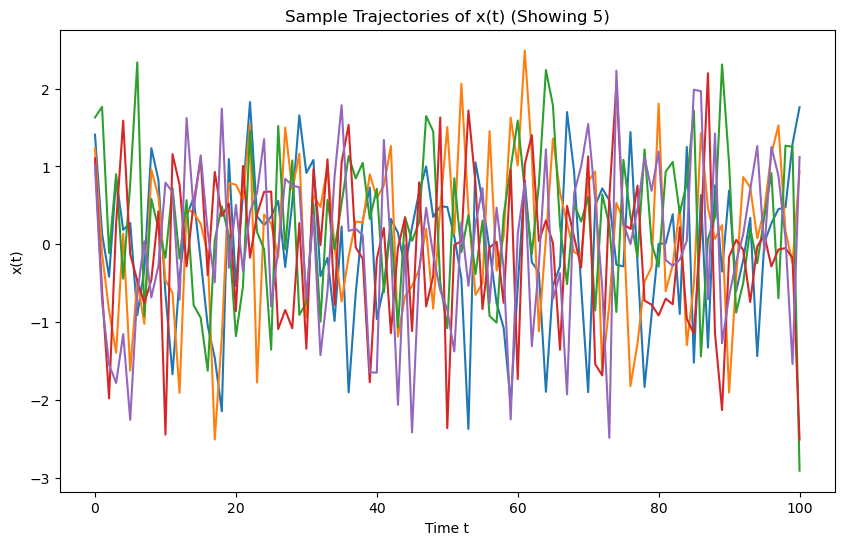

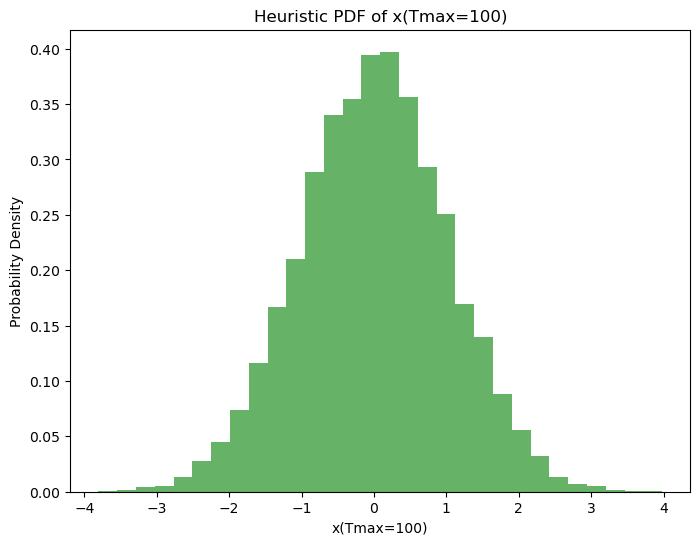

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# simulations and PDF of a disrete time model
# perturbed by an additive noise
#  x(t+1)= f(x(t)) + xi(t)

# Define your function f(x)
def f(x):
    # Modify this function based on your specific system dynamics
    #return 0.9 * x  # example: a simple linear map
    return  0.1*x - 0.01*x*x*x  # example: a cubic system
    
# Define the noise distribution
def noise_pdf(size):
    # Example: Gaussian noise with mean 0 and standard deviation 1
    return np.random.normal(0, 1, size)

# Simulation function with external PDF for x(0)
def simulate(Tmax, num_trajectories, initial_pdf):
    # Initial condition: Sample x(0) from the provided PDF function
    x0 = initial_pdf(num_trajectories)

    # Prepare to store results
    x_t = np.zeros((num_trajectories, Tmax+1))
    x_t[:, 0] = x0

    # Iterate over time steps
    for t in range(Tmax):
        noise = noise_pdf(num_trajectories)
        x_t[:, t+1] = f(x_t[:, t]) + noise

    return x_t

# Plot the trajectories (with the option to limit the number to plot)
def plot_trajectories(x_t, num_to_plot=None):
    plt.figure(figsize=(10, 6))
    
    if num_to_plot is None:
        num_to_plot = x_t.shape[0]  # Plot all trajectories if num_to_plot is None
    
    for i in range(min(num_to_plot, x_t.shape[0])):
        plt.plot(x_t[i, :]) #, label=f'Trajectory {i+1}')
    
    plt.xlabel('Time t')
    plt.ylabel('x(t)')
    plt.title(f'Sample Trajectories of x(t) (Showing {num_to_plot})')
    #plt.legend()
    plt.show()

# Compute and plot the PDF at Tmax using all trajectories for the histogram
def plot_histogram(x_t, Tmax):
    plt.figure(figsize=(8, 6))
    plt.hist(x_t[:, Tmax], bins=30, density=True, alpha=0.6, color='g')
    plt.xlabel(f'x(Tmax={Tmax})')
    plt.ylabel('Probability Density')
    plt.title(f'Heuristic PDF of x(Tmax={Tmax})')
    plt.show()

# Main function to run the simulation and plot
def main():
    Tmax = int(input("Enter the maximum time Tmax: "))
    num_trajectories = int(input("Enter the number of trajectories to simulate: "))
    
    # Ask user how many trajectories to plot
    num_to_plot = input("Enter the number of trajectories to plot (press Enter to plot all): ")
    num_to_plot = int(num_to_plot) if num_to_plot else None

    # Define the PDF of x(0) externally
    def initial_pdf(size):
        # Example: Uniform distribution for x(0) between -1 and 1
        return np.random.uniform(1, 2, size)

    # Simulate the process
    x_t = simulate(Tmax, num_trajectories, initial_pdf)

    # Plot the trajectories
    plot_trajectories(x_t, num_to_plot)

    # Plot the heuristic PDF at Tmax using all the trajectories
    plot_histogram(x_t, Tmax)

if __name__ == "__main__":
    main()



In [57]:
np.maximum(2,3)

3